In [3]:
from IPython.display import HTML
tog='''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''';
HTML(tog)

In [5]:
from myreport import html_report
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import copy

# s6_task1
## Generating Random Numbers
##### 1a. result of calling random.random() is: 


In [22]:
random.random()

0.6930935129832541

### 1b. 1,000,000 random numbers
#### i)Histogram View

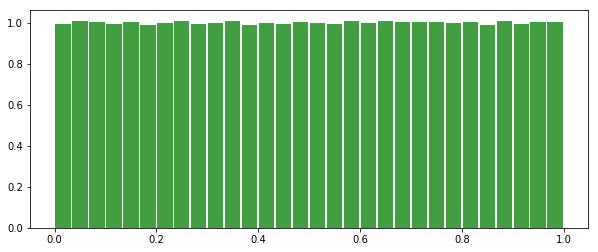

In [70]:

x=np.random.random([1000000])

plt.close('all');
fig=plt.figure(figsize=[10, 4]);
ax=plt.subplot(1,1,1)
n, bins, patches = ax.hist(x, 30, normed=1, facecolor='green', alpha=0.75,histtype='bar', rwidth=0.9)


##### ii) In words:
The distribution is uniform over the interval [0,1];
##### iii) What the function does? 
The function here used is (numpy.random.random()), it applies a pesudorandom generator to yield random numbers. 
### 1c. Consideration of the given distribution:
##### 1)  50% of the numbers > 0.5
##### 2) 50% of the numbers < 0.5
##### 3) 70% of the numbers < 0.7
### 1d. How could we simulate:
##### i) a fair coin toss?
We can set: head = (rand_number < 0.5), tail=(rand_number>0.5).
##### ii) an unfair coin toss with heads in 70% of tosses?
We can set: head = (rand_number < 0.7), tail=(rand_number>0.7).
### 1e. Functions toss_fair_coin() and toss_coin(phead)

In [90]:
def toss_fair_coin():
    r=random.random()
    return ['T','H'][r<0.5];

toss_coin=lambda x: ['T','H'][random.random()<x];

5019
6963


##### ii) Test these toss_coins fuctions

In [91]:
print('toss_fair_coin() give {} heads in 10000 events'.format([toss_fair_coin() for i  in range(10000)].count('H')))
print('toss_coin(0.7) give {} heads in 10000 events'.format([toss_coin(0.7) for i  in range(10000)].count('H')))

toss_fair_coin() give 4951 heads in 10000 events
toss_coin(0.7) give 6975 heads in 10000 events


# s6_task2
## Generateing a random Choice
You have a bag with 9 green balls and 3 red balls. In a single trial we draw a ball out, record its colour, then put it back.
### a) What's the chance of the colour to be green?
P(green) = 9/(9+3) = 0.75
### b) record result of 20 draws
|Draw   |  1 |  2 | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10  | 11  | 12  | 13  | 14  | 15  |16   |17   |18   |19   |20   |
    |---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|Colour | G  | R  |  R |  G |  G | G  |  G | G  |  G |  G | G  |  G | R  | R  |  G |  R | G  |  R | G  | G  |
###c) 


In [95]:
seq=list({'H':'G','T':'R'}[toss_coin(0.75)] for i in range(20));

# x = 0.75;
draw_ball=lambda x:{'H':'G','T':'R'}[toss_coin(x)]
draw_ball2=lambda G,R: ['R','G'][random.random() < G/(G+R)];

                                     

### Generating Random Trajectories
* Green balls represent function mRNA strands 
* Red balls represent non-functional mRNA strands
* Assume an enzyme molecule acts to degrade a mRNA strand upon collision, every 10 seconds. 
    * if it collides with a green ball, put a red ball back. E+G --> E+R 
    * if it collides with a red   ball, put a red ball back. E+R --> E+R  

### a) Simulate this with paper balls: Skipped
### b) Simulate this with Python

<function iter>

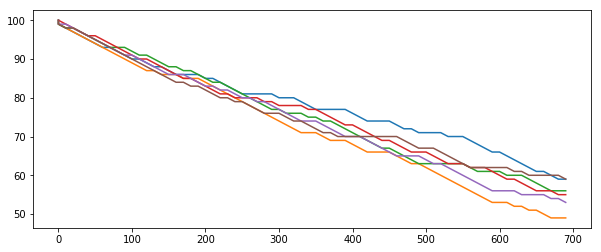

In [109]:

def march(yiter,ytnow,dt,params):
    ynow,tnow=ytnow;
    yout=yiter(ynow,tnow,params);
    tout=tnow+dt;
    return (yout,tout);


class state():
    def __init__(self,yiter,yt,dt):
        self.yiter=yiter
        self.dt=dt;
        self.yt=np.array(yt);
#         self.t=0;
        self.ys=[yt[0]];
        self.ts=[yt[1]];
#         self.ts=np.array();
    def get_params(self):
        pass
    def forward(self,dur):
        ts=np.arange(self.yt[1],self.yt[1]+dur,self.dt);
        for t in ts:
            self.yt=march(self.yiter,
                          self.yt,
                          self.dt,
                          self.get_params());
#             print(self.ys)
            self.ys=np.vstack((np.array(self.ys) ,
                                np.array(self.yt[0]) ))
        self.ts =self.ts + list(ts);
                    
        
    
def yiter(ynow,t,params):
    fmrna, nfmrna = ynow;
    react= int(random.random() < fmrna/(fmrna+nfmrna));
#     print fmrna/(fmrna+nfmrna);
    fmrna +=-react;
    nfmrna+=react;
    
    
    return  (fmrna,nfmrna)

# mrna=state(yiter,[(200.,10.),0.],1.);
# mrna.forward(1000);

mrna=state(yiter,[(100.,20.),0.],10.);
mrna.forward(300);

plt.close('all');
fig=plt.figure(figsize=[10, 4]);
ax=plt.subplot(1,1,1)

# ax.plot(mrna.ts,mrna.ys[:,0]);
# ax.plot(mrna.ts,mrna.ys[:,1]);

runs=[];
s0=state(yiter,[(100.,20.),0.],10.);
for i in range(6):
    s=copy.copy(s0);
    s.forward(700)
    runs.append(s.ys[:,0]);
#     ax.plot(s.ts,s.ys[:,0]);
#     ax.plot(s.ts,s.ys[:,1]);
ax.plot(s.ts,np.array(runs).T);




In [169]:
#dicing
random.randrange(1,7)
x=np.random.random_integers(0,5,[100,100,100]);
x.shape
x.sum(axis=2)

# sum(x,4)
# sum(x,axis=0)
# help(np.random.random_integers)

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
  app.launch_new_instance()


array([[244, 205, 250, ..., 233, 249, 278],
       [230, 252, 245, ..., 252, 252, 240],
       [249, 260, 229, ..., 236, 255, 227],
       ..., 
       [230, 257, 238, ..., 248, 190, 270],
       [261, 268, 236, ..., 265, 246, 230],
       [240, 236, 279, ..., 258, 238, 240]])

In [32]:
list(np.arange(0,10,.2))
n=np.array([[0,1],1])
n[1]

1